In [104]:
import numpy as np
import pandas as pd

In [105]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [106]:
df = pd.read_csv('../data/titanic.csv', usecols=['Age', 'Fare', 'Survived'])

In [107]:
df.dropna(inplace=True)

In [108]:
df.shape

(331, 3)

In [109]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [110]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [111]:
X_train.head()

,Age,Fare
281,0.75,13.7750
96,76.00,78.8500
341,32.00,7.5792
18,27.00,7.9250
26,22.00,61.9792


In [112]:
clf = DecisionTreeClassifier() # model

In [113]:
clf.fit(X_train, y_train) #training model
y_pred = clf.predict(X_test)

In [114]:
accuracy_score(y_test, y_pred)

0.582089552238806

In [115]:
np.mean(cross_val_score(DecisionTreeClassifier(),x, y, cv=10, scoring='accuracy'))

np.float64(0.5680926916221034)

In [116]:
#binning
kbin_age = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')
kbin_fare = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')

In [117]:
trf = ColumnTransformer([
    ('first', kbin_age,[0]),
    ('second', kbin_fare, [1])
])

In [118]:
X_train_transform = trf.fit_transform(X_train)
X_test_transform = trf.fit_transform(X_test)

In [119]:
trf.named_transformers_['second'].n_bins_

array([10])

In [120]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.17      ,  7.20285714, 15.        , 19.91911765, 24.16911765,
              29.16071429, 36.71428571, 44.8452381 , 51.5       , 57.83333333,
              61.        ])                                                   ],
      dtype=object)

In [121]:
clf = DecisionTreeClassifier()
clf.fit(X_train_transform, y_train)
y_pred2 = clf.predict(X_test_transform)

In [122]:
accuracy_score(y_test, y_pred2)

0.5671641791044776

In [123]:
X_trf = trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(), x, y, cv=10, scoring='accuracy'))

np.float64(0.5558823529411764)

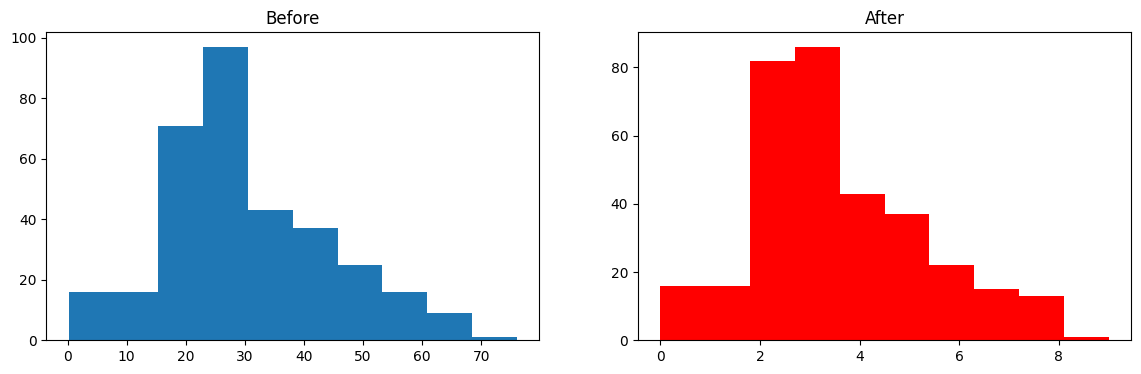

In [127]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
plt.hist(x['Age'])
plt.title('Before')

plt.subplot(122)
plt.hist(X_trf[:, 0], color='red')
plt.title('After')

plt.show()

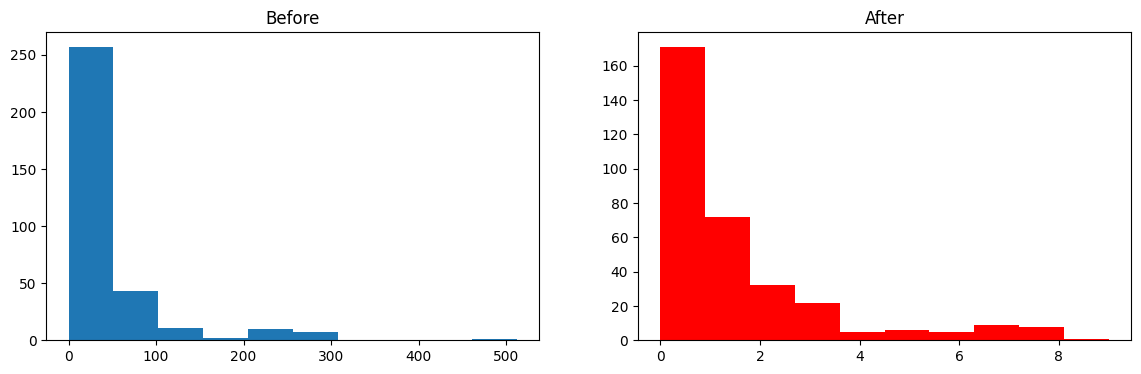

In [126]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
plt.hist(x['Fare'])
plt.title('Before')

plt.subplot(122)
plt.hist(X_trf[:, 1], color='red')
plt.title('After')

plt.show()